In [1]:
train_data_dir = "Data Set 4\Train"
validation_data_dir = "Data Set 4\Validate"

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\V'
C:\Users\gihan\AppData\Local\Temp\ipykernel_10148\3588442618.py:1: SyntaxWarning: invalid escape sequence '\T'
  train_data_dir = "Data Set 4\Train"
C:\Users\gihan\AppData\Local\Temp\ipykernel_10148\3588442618.py:2: SyntaxWarning: invalid escape sequence '\V'
  validation_data_dir = "Data Set 4\Validate"


In [2]:
# # Define constants
batch_size = 32
image_size = (224, 224)
epochs = 10

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os

#70%
# data_dir = "soil_img/train"
# #20%
# validation_data_dir = "soil_img/validation"
# #10%
# test_data_dir = "soil_img/test"

# Configure ImageDataGenerator for training with augmentation
# train_datagen = image.ImageDataGenerator(
datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    # brightness_range=[0.9, 1.1],
    brightness_range=[0.8, 1.2],
    rotation_range=360,
    fill_mode='nearest',
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

# Train image data generator
# train_generator = train_datagen.flow_from_directory(
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    # subset='training'
)

# Validation image data generator
# validation_generator = validation_datagen.flow_from_directory(
validation_generator = datagen.flow_from_directory(
    #image.ImageDataGenerator(rescale=1./255),
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    # subset='validation'
)

# # Test image data generator
# test_generator = datagen.flow_from_directory(
#     #image.ImageDataGenerator(rescale=1./255),
# # test_generator = test_datagen.flow_from_directory(
#     data_dir,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation'
# )


Found 3840 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


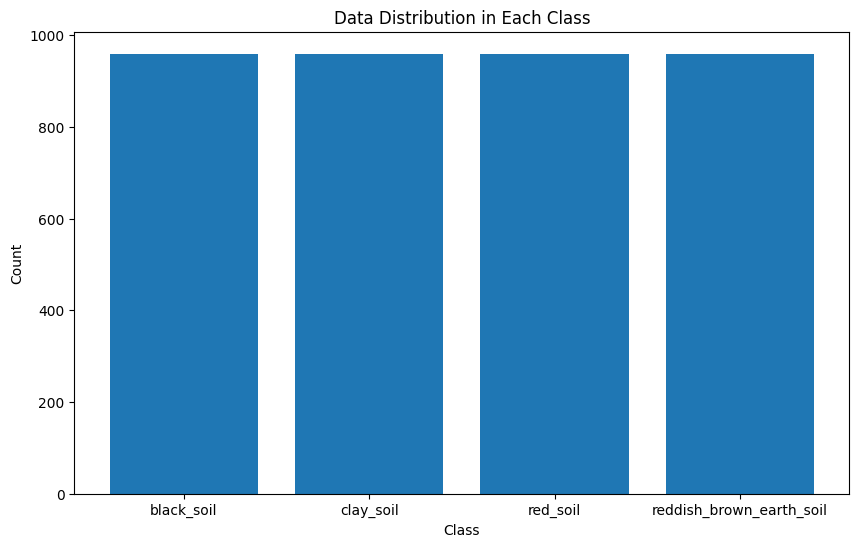

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the class labels
class_labels = train_generator.class_indices.keys()

# Count the number of samples in each class
label_counts = train_generator.classes
label_counts = Counter(label_counts)

# Plot the distribution of data in each class
plt.figure(figsize=(10, 6))
plt.bar(class_labels, label_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution in Each Class')
plt.show()

In [5]:
# Print the number of images in the training and validation sets
print(f"Number of images in the training set: {train_generator.samples}")
print(f"Number of images in the validation set: {validation_generator.samples}")

# Print the number of classes
print(f"Number of classes: {train_generator.num_classes}")

Number of images in the training set: 3840
Number of images in the validation set: 960
Number of classes: 4


In [6]:

# # Define model architecture with Batch Normalization
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     #Conv2D(128, (3, 3), activation='relu'),
#     #BatchNormalization(),
#     #MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),  # Increased dropout for better regularization
#     Dense(6, activation='softmax')
# ])


In [7]:
from tensorflow.keras import layers, models, regularizers

In [8]:
# # Build a simple convolutional neural network (CNN) model
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # Output classes dynamically based on the number of classes

In [9]:
# Build a simple convolutional neural network (CNN) model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #L2 Regularizer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # Output classes dynamically based on the number of classes

c:\Users\gihan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:

# Configure the optimizer and compile the model
optimizer = 'adam'
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
#model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


In [11]:

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    #callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping]
)


Epoch 1/30


c:\Users\gihan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 499s 4s/step - accuracy: 0.5819 - loss: 3.8221 - val_accuracy: 0.7083 - val_loss: 0.9300
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 474s 4s/step - accuracy: 0.7692 - loss: 0.7319 - val_accuracy: 0.8062 - val_loss: 0.7042
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 525s 4s/step - accuracy: 0.7822 - loss: 0.6236 - val_accuracy: 0.7865 - val_loss: 0.7241
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.7915 - loss: 0.6415 - val_accuracy: 0.8292 - val_loss: 0.5973
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 480s 4s/step - accuracy: 0.7972 - loss: 0.5406 - val_accuracy: 0.8083 - val_loss: 0.5950
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 463s 4s/step - accuracy: 0.7966 - loss: 0.5836 - val_accuracy: 0.8333 - val_loss: 0.5692
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 468s 4s/step - accuracy: 0.8155 - loss: 0.5460 - val_accuracy: 0.8385 - val_loss: 0.5203
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 496s 4s/step - accuracy: 0.8113 - loss: 0.5375 - val_accuracy: 0.840

In [12]:

# Load the best saved model
model.load_weights('best_model.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'best_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

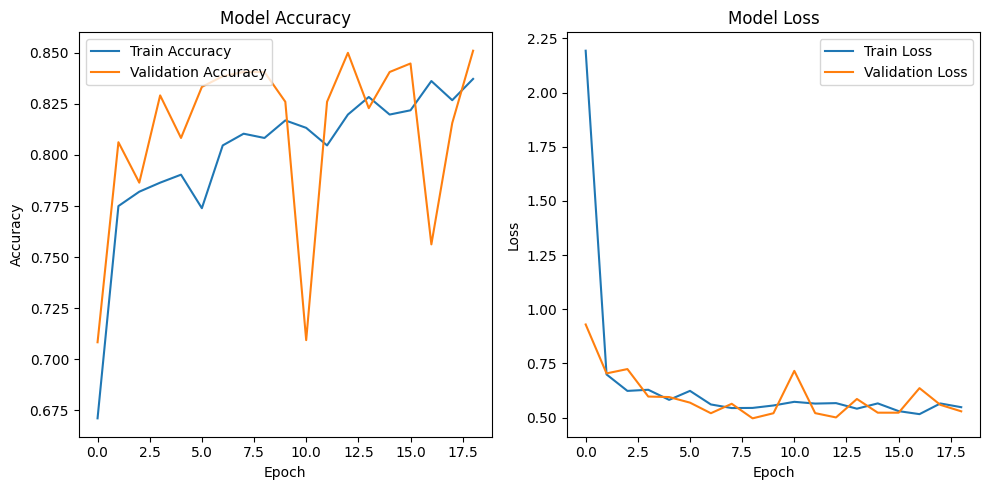

In [18]:

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:


# # Evaluate model on test data
# pred = model.evaluate(test_generator)

# # Prediction on test data
# predictions = model.predict(test_generator)
# y_pred = np.argmax(predictions, axis=1)
# y_true = test_generator.classes

# # Scatter plot for model predictions
# plt.figure(figsize=(12, 8))
# categories = list(test_generator.class_indices.keys())
# colors = ['green' if pred == true else 'red' for pred, true in zip(y_pred, y_true)]
# for idx, (true, pred) in enumerate(zip(y_true, y_pred)):
#     plt.scatter(categories[true], categories[pred], color=colors[idx], label=f"True: {categories[true]}, Pred: {categories[pred]}" if idx == 0 else "")
# plt.xlabel('True Classes')
# plt.ylabel('Predicted Classes')
# plt.title('Scatter Plot of Model Predictions')
# plt.legend(handles=[plt.Line2D([0], [0],)])

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# acc = accuracy_score(y_true, y_pred)
# prec = precision_score(y_true, y_pred, average='weighted')
# rec = recall_score(y_true, y_pred, average='weighted')
# f1 = f1_score(y_true, y_pred, average='weighted')

# print("Accuracy: ", acc)
# print("Precision: ", prec)
# print("Recall: ", rec)
# print("F1 Score: ", f1)
# conf_matrix = confusion_matrix(y_true, y_pred)
# print("Confusion Matrix: ")
# print(conf_matrix)

# model.save_weights("model_weights.h5")

# import tensorflow as tf
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()
# with open('soil_clf_model.tflite', 'wb') as f:
#     f.write(tflite_model)


Found 3072 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━

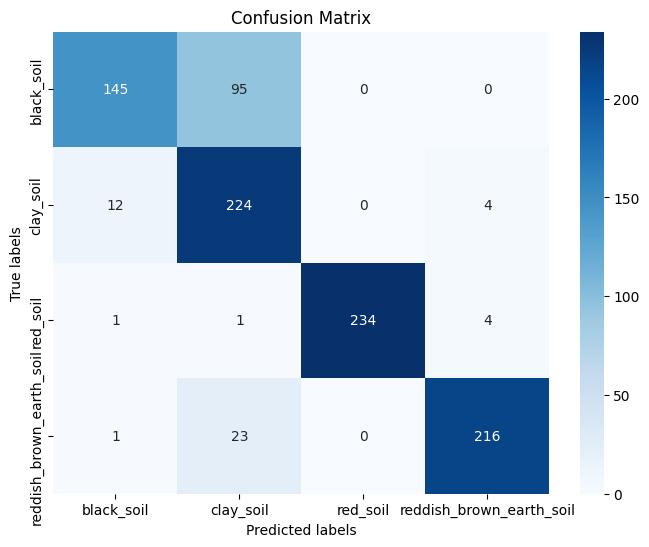

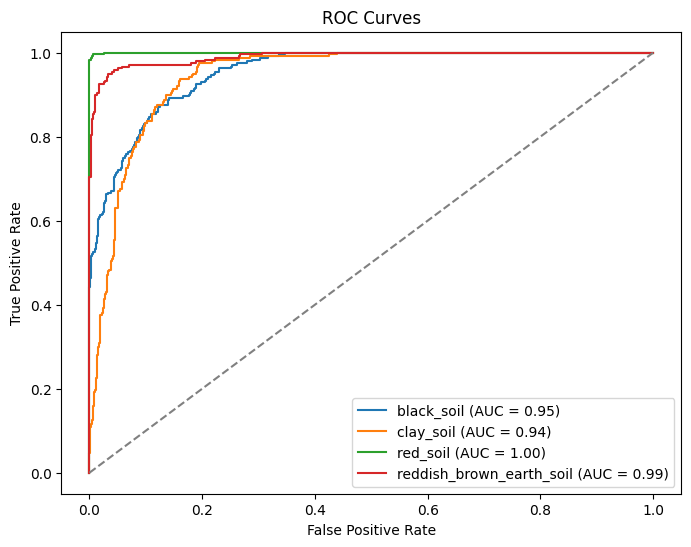

ROC AUC (black_soil): 0.9539
ROC AUC (clay_soil): 0.9441
ROC AUC (red_soil): 0.9998
ROC AUC (reddish_brown_earth_soil): 0.9900
Accuracy: 0.8531
Precision: 0.8823
Recall: 0.8531
F1 Score: 0.8534


In [19]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot ROC curves
def plot_roc_curves(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true == i, y_prob[:, i])
        auc = roc_auc_score(y_true == i, y_prob[:, i])
        plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

# Load and augment data
train_data = datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Get predictions and true labels for validation data
y_val_true = []
y_val_pred_prob = []

for _ in range(len(validation_generator)):
    x_val_batch, y_val_batch = next(validation_generator)
    y_val_true.extend(np.argmax(y_val_batch, axis=1))
    y_val_pred_prob.extend(model.predict(x_val_batch))

y_val_true = np.array(y_val_true)
y_val_pred_prob = np.array(y_val_pred_prob)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_val_true, y_val_pred, classes=list(train_data.class_indices.keys()))

# Plot ROC curves
plot_roc_curves(y_val_true, y_val_pred_prob, classes=list(train_data.class_indices.keys()))

# Print ROC AUC values
for i, class_name in enumerate(train_data.class_indices.keys()):
    auc = roc_auc_score((y_val_true == i).astype(int), y_val_pred_prob[:, i])
    print(f'ROC AUC ({class_name}): {auc:.4f}')

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val_true, y_val_pred)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')
f1 = f1_score(y_val_true, y_val_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')